In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r'C:\\Users\\admino\\Downloads\\forestfires.csv')

In [4]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [5]:
# убираем нулевые значения area

df = df.loc[df['area'] != 0.0]

In [6]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
138,9,9,jul,tue,85.8,48.3,313.4,3.9,18.0,42,2.7,0.0,0.36
139,1,4,sep,tue,91.0,129.5,692.6,7.0,21.7,38,2.2,0.0,0.43
140,2,5,sep,mon,90.9,126.5,686.5,7.0,21.9,39,1.8,0.0,0.47
141,1,2,aug,wed,95.5,99.9,513.3,13.2,23.3,31,4.5,0.0,0.55
142,8,6,aug,fri,90.1,108.0,529.8,12.5,21.2,51,8.9,0.0,0.61


In [17]:
# вводим дамми-переменные для различных месяцев года
# так можно будет численно построить регрессию

# для января
df['jan'] = df['month']
df.loc[df['month'] == 'jan', 'jan'] = 1
df.loc[df['month'] != 'jan', 'jan'] = 0

# для февраля
df['feb'] = df['month']
df.loc[df['month'] == 'feb', 'feb'] = 1
df.loc[df['month'] != 'feb', 'feb'] = 0

# для марта
df['mar'] = df['month']
df.loc[df['month'] == 'mar', 'mar'] = 1
df.loc[df['month'] != 'mar', 'mar'] = 0

# для апреля
df['apr'] = df['month']
df.loc[df['month'] == 'apr', 'apr'] = 1
df.loc[df['month'] != 'apr', 'apr'] = 0

# для мая
df['may'] = df['month']
df.loc[df['month'] == 'may', 'may'] = 1
df.loc[df['month'] != 'may', 'may'] = 0

# для июня
df['jun'] = df['month']
df.loc[df['month'] == 'jun', 'jun'] = 1
df.loc[df['month'] != 'jun', 'jun'] = 0

# для июля
df['jul'] = df['month']
df.loc[df['month'] == 'jul', 'jul'] = 1
df.loc[df['month'] != 'jul', 'jul'] = 0

# для августа
df['aug'] = df['month']
df.loc[df['month'] == 'aug', 'aug'] = 1
df.loc[df['month'] != 'aug', 'aug'] = 0

# для сентбяря
df['sep'] = df['month']
df.loc[df['month'] == 'sep', 'sep'] = 1
df.loc[df['month'] != 'sep', 'sep'] = 0

# для октября
df['oct'] = df['month']
df.loc[df['month'] == 'oct', 'oct'] = 1
df.loc[df['month'] != 'oct', 'oct'] = 0
   
# для ноября
df['nov'] = df['month']
df.loc[df['month'] == 'nov', 'nov'] = 1
df.loc[df['month'] != 'nov', 'nov'] = 0

# для декабря
df['dec'] = df['month']
df.loc[df['month'] == 'dec', 'dec'] = 1
df.loc[df['month'] != 'dec', 'dec'] = 0

df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,...,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
138,9,9,jul,tue,85.8,48.3,313.4,3.9,18.0,42,...,0,0,0,0,1,0,0,0,0,0
139,1,4,sep,tue,91.0,129.5,692.6,7.0,21.7,38,...,0,0,0,0,0,0,1,0,0,0
140,2,5,sep,mon,90.9,126.5,686.5,7.0,21.9,39,...,0,0,0,0,0,0,1,0,0,0
141,1,2,aug,wed,95.5,99.9,513.3,13.2,23.3,31,...,0,0,0,0,0,1,0,0,0,0
142,8,6,aug,fri,90.1,108.0,529.8,12.5,21.2,51,...,0,0,0,0,0,1,0,0,0,0


In [20]:
# ещё введём дамми-переменные за сезоны

# для зимы
df['winter'] = 0
df.loc[df['month'] == 'dec', 'winter'] = 1
df.loc[df['month'] == 'jan', 'winter'] = 1
df.loc[df['month'] == 'feb', 'winter'] = 1

# для весны
df['spring'] = 0
df.loc[df['month'] == 'mar', 'spring'] = 1
df.loc[df['month'] == 'apr', 'spring'] = 1
df.loc[df['month'] == 'may', 'spring'] = 1
   
# для лета
df['summer'] = 0
df.loc[df['month'] == 'jun', 'summer'] = 1
df.loc[df['month'] == 'jul', 'summer'] = 1
df.loc[df['month'] == 'aug', 'summer'] = 1

# для декабря
df['autumn'] = 0
df.loc[df['month'] == 'sep', 'autumn'] = 1
df.loc[df['month'] == 'oct', 'autumn'] = 1
df.loc[df['month'] == 'nov', 'autumn'] = 1

df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,...,jul,aug,sep,oct,nov,dec,winter,spring,summer,autumn
138,9,9,jul,tue,85.8,48.3,313.4,3.9,18.0,42,...,1,0,0,0,0,0,0,0,1,0
139,1,4,sep,tue,91.0,129.5,692.6,7.0,21.7,38,...,0,0,1,0,0,0,0,0,0,1
140,2,5,sep,mon,90.9,126.5,686.5,7.0,21.9,39,...,0,0,1,0,0,0,0,0,0,1
141,1,2,aug,wed,95.5,99.9,513.3,13.2,23.3,31,...,0,1,0,0,0,0,0,0,1,0
142,8,6,aug,fri,90.1,108.0,529.8,12.5,21.2,51,...,0,1,0,0,0,0,0,0,1,0


In [21]:
# проведём бинаризацию дней недели, чтобы разделить выходные и будние дни

df['weekday'] = 0
df.loc[df['day'] == 'sat', 'weekday'] = 1
df.loc[df['day'] == 'sun', 'weekday'] = 1

df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,...,aug,sep,oct,nov,dec,winter,spring,summer,autumn,weekday
138,9,9,jul,tue,85.8,48.3,313.4,3.9,18.0,42,...,0,0,0,0,0,0,0,1,0,0
139,1,4,sep,tue,91.0,129.5,692.6,7.0,21.7,38,...,0,1,0,0,0,0,0,0,1,0
140,2,5,sep,mon,90.9,126.5,686.5,7.0,21.9,39,...,0,1,0,0,0,0,0,0,1,0
141,1,2,aug,wed,95.5,99.9,513.3,13.2,23.3,31,...,1,0,0,0,0,0,0,1,0,0
142,8,6,aug,fri,90.1,108.0,529.8,12.5,21.2,51,...,1,0,0,0,0,0,0,1,0,0


In [23]:
# Задание 2

# Я решила сначала отобрать следующие признаки для модели:
# координаты на карте Montesinho park - возможно, есть места, где пожары вероятнее всего (лес, поле с сухостоем)
# дамми-переменные сезонов - скорее всего, лесных пожаров больше в летние и весенние месяцы
# дамми для выходных/будних дней
# индекс FFMC (Canadian Forest Fire Weather Index) - решила использовать только этот индекс, иначе точно будет мультиколлинеарность
# temp - temperature in Celsius degrees: 2.2 to 33.30
# RH - relative humidity in %: 15.0 to 100
# wind - wind speed in km/h: 0.40 to 9.40
# rain - outside rain in mm/m2 : 0.0 to 6.4

del df['month']
del df['day']
del df['DMC'] 
del df['DC']
del df['ISI']
del df['jan']
del df['feb']
del df['mar']
del df['apr']
del df['may']
del df['jun']
del df['jul']
del df['aug']
del df['sep']
del df['oct']
del df['nov']
del df['dec']

df.head()



,X,Y,FFMC,temp,RH,wind,rain,area,winter,spring,summer,autumn,weekday
138,9,9,85.8,18.0,42,2.7,0.0,0.36,0,0,1,0,0
139,1,4,91.0,21.7,38,2.2,0.0,0.43,0,0,0,1,0
140,2,5,90.9,21.9,39,1.8,0.0,0.47,0,0,0,1,0
141,1,2,95.5,23.3,31,4.5,0.0,0.55,0,0,1,0,0
142,8,6,90.1,21.2,51,8.9,0.0,0.61,0,0,1,0,0


In [24]:
# Описательные статистики

df.describe()

,X,Y,FFMC,temp,RH,wind,rain,area,winter,spring,summer,autumn,weekday
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000
mean,4.807407,4.366667,91.034074,19.311111,43.733333,4.112963,0.028889,24.600185,0.070370,0.088889,0.462963,0.377778,0.329630
std,2.383326,1.170740,3.709020,6.179444,15.080059,1.884573,0.398392,86.501635,0.256245,0.285112,0.499552,0.485732,0.470952
min,1.000000,2.000000,63.500000,2.200000,15.000000,0.400000,0.000000,0.090000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,4.000000,90.325000,16.125000,33.000000,2.700000,0.000000,2.140000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.000000,4.000000,91.700000,20.100000,41.000000,4.000000,0.000000,6.370000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.000000,5.000000,92.975000,23.400000,53.000000,4.900000,0.000000,15.422500,0.000000,0.000000,1.000000,1.000000,1.000000
max,9.000000,9.000000,96.200000,33.300000,96.000000,9.400000,6.400000,1090.840000,1.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

# будем отображать графики прямо в jupyter'e
%matplotlib inline
import seaborn as sns

#графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg' 

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5
import pandas as pd

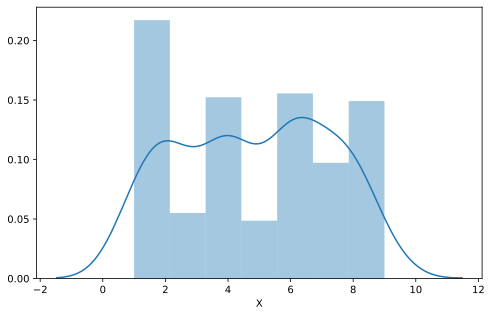

In [28]:
sns_plot = sns.distplot(df['X'])
fig1 = sns_plot.get_figure()

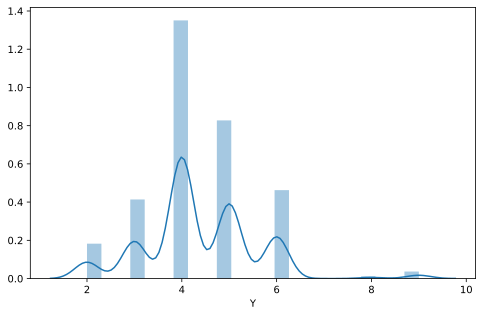

In [31]:
sns_plot = sns.distplot(df['Y'])
fig2 = sns_plot.get_figure()

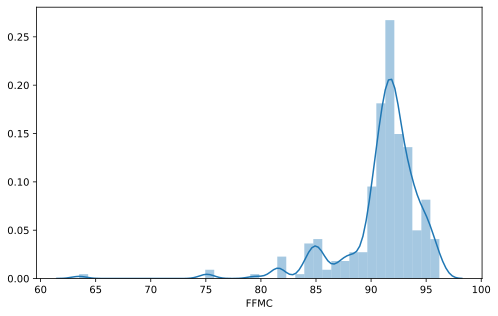

In [32]:
sns_plot = sns.distplot(df['FFMC'])
fig = sns_plot.get_figure()

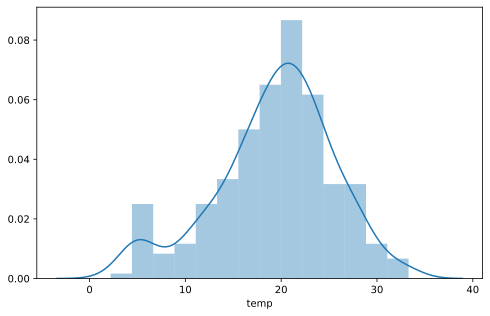

In [33]:
sns_plot = sns.distplot(df['temp'])
fig = sns_plot.get_figure()

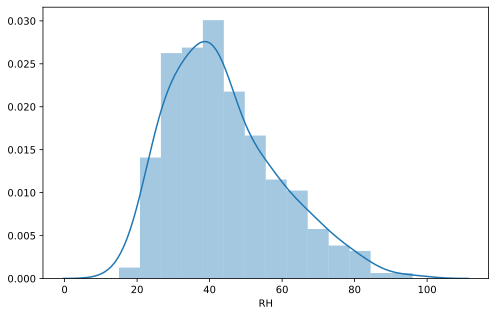

In [34]:
sns_plot = sns.distplot(df['RH'])
fig = sns_plot.get_figure()

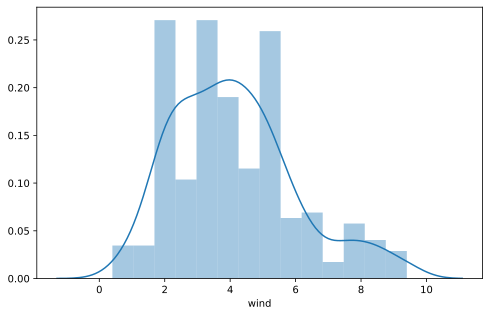

In [35]:
sns_plot = sns.distplot(df['wind'])
fig = sns_plot.get_figure()

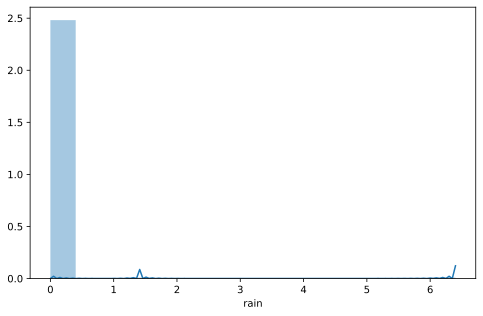

In [36]:
sns_plot = sns.distplot(df['rain'])
fig = sns_plot.get_figure()

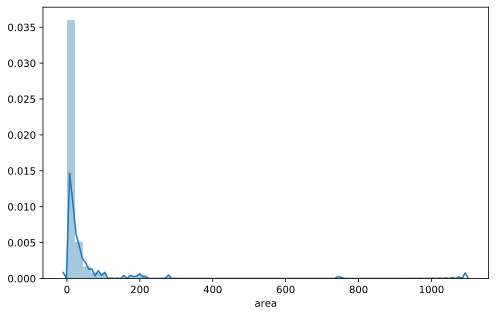

In [37]:
sns_plot = sns.distplot(df['area'])
fig = sns_plot.get_figure()

Text(0, 0.5, 'Frequency')

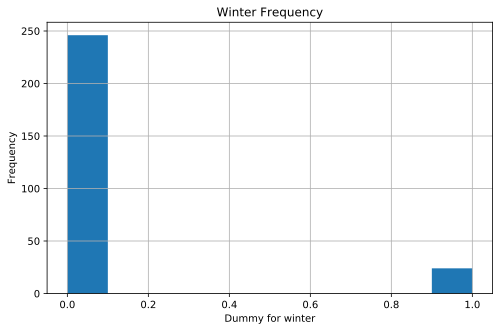

In [47]:
ax = df['spring'].hist()
ax.set_title('Winter Frequency')
ax.set_xlabel('Dummy for winter')
ax.set_ylabel('Frequency')

Text(0, 0.5, 'Frequency')

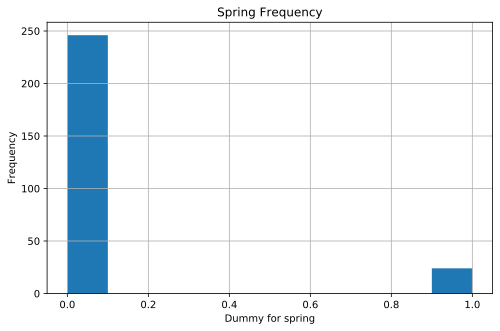

In [48]:
bx = df['spring'].hist()
bx.set_title('Spring Frequency')
bx.set_xlabel('Dummy for spring')
bx.set_ylabel('Frequency')

Text(0, 0.5, 'Frequency')

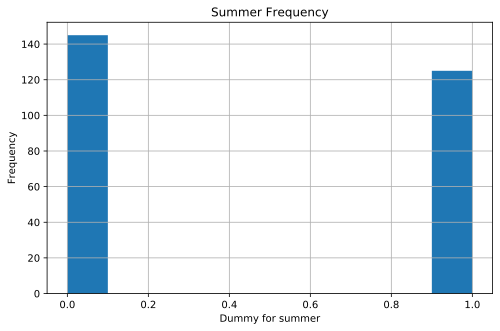

In [49]:
cx = df['summer'].hist()
cx.set_title('Summer Frequency')
cx.set_xlabel('Dummy for summer')
cx.set_ylabel('Frequency')

Text(0, 0.5, 'Frequency')

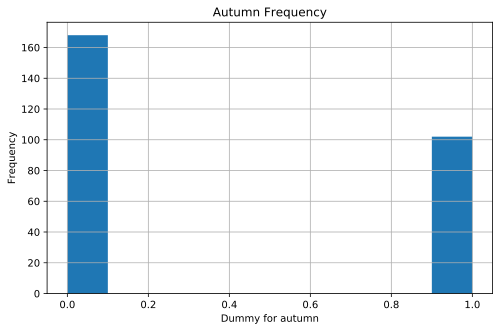

In [51]:
dx = df['autumn'].hist()
dx.set_title('Autumn Frequency')
dx.set_xlabel('Dummy for autumn')
dx.set_ylabel('Frequency')

Text(0, 0.5, 'Frequency')

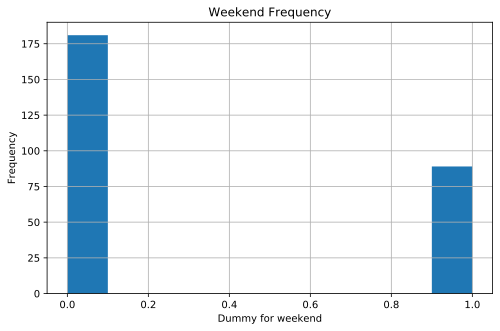

In [52]:
dx = df['weekday'].hist()
dx.set_title('Weekend Frequency')
dx.set_xlabel('Dummy for weekend')
dx.set_ylabel('Frequency')

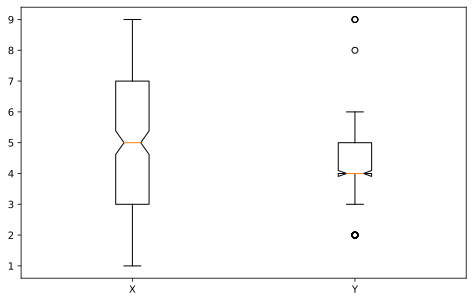

In [59]:
# бокс-плоты

plt.boxplot((df['X'], df['Y']), notch=True, sym="o", labels = ['X', 'Y'])
plt.show()

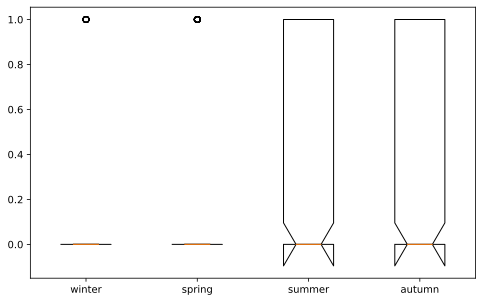

In [60]:
plt.boxplot((df['winter'], df['spring'], df['summer'], df['autumn']), notch=True, sym="o", labels = ['winter', 'spring', 'summer', 'autumn'])
plt.show()

# не очень удачная визуализация с бинарными переменными

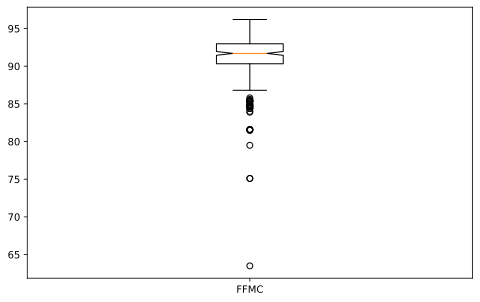

In [61]:
plt.boxplot((df['FFMC']), notch=True, sym="o", labels = ['FFMC'])
plt.show()

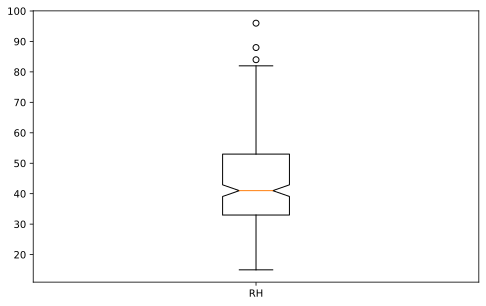

In [62]:
plt.boxplot((df['RH']), notch=True, sym="o", labels = ['RH'])
plt.show()

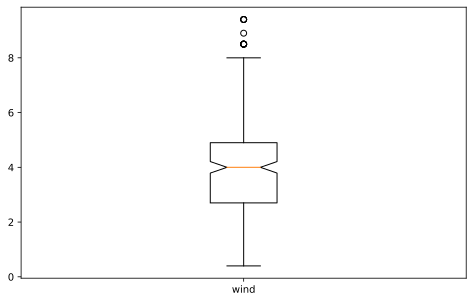

In [63]:
plt.boxplot((df['wind']), notch=True, sym="o", labels = ['wind'])
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

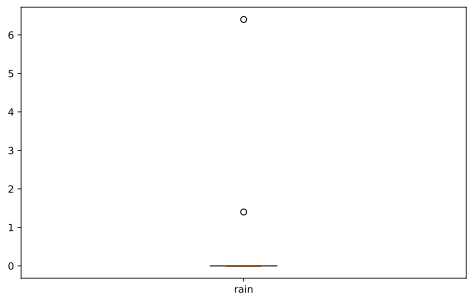

In [64]:
plt.boxplot((df['rain']), notch=True, sym="o", labels = ['rain'])
plt.show

У некоторых признаков имеются выбросы. Выкинем наблюдения с выбросами.

In [66]:
# Q1 =  df['y'].quantile(0.25)
# Q3 = df['y'].quantile(0.75)

df_new = df[(df['Y'] > df['Y'].quantile(0.25)) & (df['Y'] < df['Y'].quantile(0.75))]
df_new = df[(df['FFMC'] > df['FFMC'].quantile(0.25)) & (df['FFMC'] < df['FFMC'].quantile(0.75))]
df_new = df[(df['RH'] > df['RH'].quantile(0.25)) & (df['RH'] < df['RH'].quantile(0.75))]
df_new = df[(df['wind'] > df['wind'].quantile(0.25)) & (df['wind'] < df['wind'].quantile(0.75))]

df_new.describe()

,X,Y,FFMC,temp,RH,wind,rain,area,winter,spring,summer,autumn,weekday
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0,100.000000,100.00,100.000000,100.000000,100.000000,100.000000
mean,4.940000,4.360000,91.500000,20.618000,41.740000,3.777000,0.0,29.372300,0.01,0.100000,0.510000,0.380000,0.300000
std,2.521904,1.251423,3.727078,5.441004,14.892626,0.503494,0.0,111.798073,0.10,0.301511,0.502418,0.487832,0.460566
min,1.000000,2.000000,63.500000,5.300000,21.000000,3.100000,0.0,0.170000,0.00,0.000000,0.000000,0.000000,0.000000
25%,2.000000,4.000000,90.675000,16.800000,28.000000,3.100000,0.0,2.170000,0.00,0.000000,0.000000,0.000000,0.000000
50%,5.500000,4.000000,92.100000,20.550000,39.500000,4.000000,0.0,6.575000,0.00,0.000000,1.000000,0.000000,0.000000
75%,7.000000,5.000000,93.225000,24.300000,50.000000,4.000000,0.0,16.875000,0.00,0.000000,1.000000,1.000000,1.000000
max,9.000000,9.000000,96.200000,33.100000,82.000000,4.500000,0.0,1090.840000,1.00,1.000000,1.000000,1.000000,1.000000


Что-то слишком много выкинулось, больше половины. Скорее всего, за счёт FFMC.

In [69]:
df_new = df[(df['Y'] > df['Y'].quantile(0.1)) & (df['Y'] < df['Y'].quantile(0.9))]
df_new = df[(df['FFMC'] > df['FFMC'].quantile(0.1)) & (df['FFMC'] < df['FFMC'].quantile(0.9))]
df_new = df[(df['RH'] > df['RH'].quantile(0.1)) & (df['RH'] < df['RH'].quantile(0.9))]
df_new = df[(df['wind'] > df['wind'].quantile(0.1)) & (df['wind'] < df['wind'].quantile(0.9))]

df_new.describe()

,X,Y,FFMC,temp,RH,wind,rain,area,winter,spring,summer,autumn,weekday
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,4.840376,4.422535,91.184507,19.875587,43.708920,3.954460,0.030047,27.563052,0.037559,0.093897,0.464789,0.403756,0.309859
std,2.440396,1.193480,3.738100,5.862003,14.742115,1.184906,0.438521,96.113492,0.190574,0.292372,0.499934,0.491805,0.463525
min,1.000000,2.000000,63.500000,2.200000,21.000000,2.200000,0.000000,0.090000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,4.000000,90.500000,16.800000,33.000000,3.100000,0.000000,2.180000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.000000,4.000000,91.700000,20.300000,41.000000,4.000000,0.000000,6.440000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.000000,5.000000,93.100000,23.600000,53.000000,4.900000,0.000000,16.330000,0.000000,0.000000,1.000000,1.000000,1.000000
max,9.000000,9.000000,96.200000,33.300000,96.000000,6.300000,6.400000,1090.840000,1.000000,1.000000,1.000000,1.000000,1.000000


Теперь нормасик (наверное).

ЗАДАНИЕ 3

In [70]:
import statsmodels.api as sm

corr = np.corrcoef(df, rowvar=0)  # correlation matrix
w, v = np.linalg.eig(corr)

In [71]:
w

array([ 2.76106789e+00,  1.88513092e+00,  1.47100272e+00,  1.31314043e-01,
        4.77207303e-01,  4.35335346e-01,  7.35960643e-01,  7.88081416e-01,
        1.16762146e+00,  9.98571033e-01,  1.05219821e+00,  1.09650903e+00,
       -2.42009033e-16])

In [73]:
v

array([[ 6.24119122e-02,  3.09691884e-01, -6.03251568e-01,
        -2.55773039e-02,  6.86172595e-01, -1.50287686e-01,
         1.06392348e-01,  9.43835066e-02,  4.27967914e-02,
         5.59544945e-02, -1.30459639e-01,  2.28133027e-04,
        -3.79434698e-18],
       [-7.48327618e-03,  2.74416431e-01, -6.16526204e-01,
         1.29608126e-02, -6.67144954e-01,  1.08413108e-01,
         1.65657058e-01, -1.19936854e-01,  1.45479179e-01,
         1.40053980e-01,  1.85449614e-02,  6.76827462e-02,
        -6.90162348e-17],
       [-4.63657491e-01,  2.70968038e-03,  2.03420782e-02,
        -8.70848486e-02, -1.74248014e-01, -7.70592400e-01,
         2.52300528e-01,  1.97807267e-01, -9.35347088e-02,
        -1.13467845e-01, -5.19108940e-02, -1.60437199e-01,
         6.67330534e-17],
       [-5.50705811e-01, -3.29942697e-03, -1.92654823e-02,
        -7.19120706e-01,  1.13235023e-01,  3.60237143e-01,
         6.98839610e-02, -1.44247337e-01,  1.74676825e-02,
        -3.99140953e-02,  8.07025459e

Можно обнаружить высокую мультиколлинеарность, проверяя собственные значения корреляционной матрицы. Очень низкое собственное значение показывает, что данные являются коллинеарными, а соответствующий собственный вектор показывает, какие переменные являются коллинеарными.
Если в данных нет коллинеарности, то можно ожидать, что ни одно из собственных значений не близко к нулю.

Как мы видим, одно из собственных значений очень близко к нулю (последнее). Значит, в данных присутствует мультиколлинеарность.

Попробуем использовать VIF.

In [74]:
df_cor = df.corr()
pd.DataFrame(np.linalg.inv(df.corr().values), index = df_cor.index, columns=df_cor.columns)

,X,Y,FFMC,temp,RH,wind,rain,area,winter,spring,summer,autumn,weekday
X,1.390748,-0.681008,0.070841,0.154673,-0.034632,-0.025890,-0.062246,-0.095696,1.385759e-01,-7.625856e-02,-4.334724e-02,7.584139e-02,0.046007
Y,-0.681008,1.357139,0.024529,-0.091708,0.058749,0.075582,0.000352,-0.013489,-9.529650e-02,2.364840e-02,-3.525650e-02,2.955680e-02,0.033453
FFMC,0.070841,0.024529,1.746123,-0.130319,0.373026,-0.066193,-0.126744,-0.018053,7.118446e-01,1.493733e-01,-4.221052e-01,-1.400034e-01,0.015431
temp,0.154673,-0.091708,-0.130319,4.416588,2.004798,0.357985,-0.436001,-0.149201,1.592057e+00,8.948336e-01,-1.874786e+00,-7.406489e-01,-0.405844
RH,-0.034632,0.058749,0.373026,2.004798,2.093353,0.031738,-0.333292,0.050067,7.924562e-01,4.789226e-01,-1.033701e+00,-4.142795e-01,-0.305312
wind,-0.025890,0.075582,-0.066193,0.357985,0.031738,1.195958,-0.076968,-0.057072,-1.859465e-01,-9.536400e-02,-1.272813e-01,1.048744e-01,-0.000756
rain,-0.062246,0.000352,-0.126744,-0.436001,-0.333292,-0.076968,1.078610,0.017489,-1.791162e-01,-8.214101e-02,1.699521e-01,9.864425e-02,0.104598
area,-0.095696,-0.013489,-0.018053,-0.149201,0.050067,-0.057072,0.017489,1.041103,-4.546097e-02,8.066665e-03,5.953074e-02,-5.015090e-02,-0.095173
winter,0.138509,-0.094814,0.706075,1.578404,0.784737,-0.187150,-0.177938,-0.045743,-2.738630e+13,-3.047143e+13,-5.338985e+13,-5.191280e+13,-0.107474
spring,-0.075987,0.024182,0.143513,0.886974,0.472096,-0.095270,-0.080958,0.007052,-3.047143e+13,-3.390411e+13,-5.940434e+13,-5.776090e+13,-0.128434


Видим, что VIF не близок к единице у температуры, RH и сезонов года. Возможно, это связано с тем, что температура, RH и сезоны года линейно связаны (логично). Попробуем их выкинуть.

In [75]:
del df['winter']
del df['spring']
del df['summer']
del df['autumn']

df.head()

,X,Y,FFMC,temp,RH,wind,rain,area,weekday
138,9,9,85.8,18.0,42,2.7,0.0,0.36,0
139,1,4,91.0,21.7,38,2.2,0.0,0.43,0
140,2,5,90.9,21.9,39,1.8,0.0,0.47,0
141,1,2,95.5,23.3,31,4.5,0.0,0.55,0
142,8,6,90.1,21.2,51,8.9,0.0,0.61,0


In [76]:
df_cor = df.corr()
pd.DataFrame(np.linalg.inv(df.corr().values), index = df_cor.index, columns=df_cor.columns)

,X,Y,FFMC,temp,RH,wind,rain,area,weekday
X,1.360801,-0.675482,0.018629,0.086780,-0.066899,-0.039798,-0.056311,-0.082951,0.035454
Y,-0.675482,1.345783,0.051682,-0.080366,0.060212,0.053761,-0.005070,-0.010501,0.030822
FFMC,0.018629,0.051682,1.473126,-0.831575,0.011948,-0.026151,-0.051957,0.003431,0.059745
temp,0.086780,-0.080366,-0.831575,2.015870,0.731036,0.411825,-0.203694,-0.087756,-0.219212
RH,-0.066899,0.060212,0.011948,0.731036,1.415583,0.053254,-0.211609,0.083180,-0.205919
wind,-0.039798,0.053761,-0.026151,0.411825,0.053254,1.128497,-0.093029,-0.039807,-0.024744
rain,-0.056311,-0.005070,-0.051957,-0.203694,-0.211609,-0.093029,1.054207,0.014081,0.084164
area,-0.082951,-0.010501,0.003431,-0.087756,0.083180,-0.039807,0.014081,1.032466,-0.091317
weekday,0.035454,0.030822,0.059745,-0.219212,-0.205919,-0.024744,0.084164,-0.091317,1.050577


Выкинем ещё температуру.

In [77]:
del df['temp']

In [78]:
df.head()

,X,Y,FFMC,RH,wind,rain,area,weekday
138,9,9,85.8,42,2.7,0.0,0.36,0
139,1,4,91.0,38,2.2,0.0,0.43,0
140,2,5,90.9,39,1.8,0.0,0.47,0
141,1,2,95.5,31,4.5,0.0,0.55,0
142,8,6,90.1,51,8.9,0.0,0.61,0


In [79]:
df_cor = df.corr()
pd.DataFrame(np.linalg.inv(df.corr().values), index = df_cor.index, columns=df_cor.columns)

,X,Y,FFMC,RH,wind,rain,area,weekday
X,1.357066,-0.672023,0.054426,-0.098369,-0.057526,-0.047542,-0.079173,0.044890
Y,-0.672023,1.342579,0.018530,0.089356,0.070179,-0.013190,-0.013999,0.022082
FFMC,0.054426,0.018530,1.130089,0.313511,0.143733,-0.135984,-0.032769,-0.030683
RH,-0.098369,0.089356,0.313511,1.150480,-0.096091,-0.137741,0.115004,-0.126424
wind,-0.057526,0.070179,0.143733,-0.096091,1.044364,-0.051416,-0.021879,0.020039
rain,-0.047542,-0.013190,-0.135984,-0.137741,-0.051416,1.033625,0.005213,0.062014
area,-0.079173,-0.013999,-0.032769,0.115004,-0.021879,0.005213,1.028646,-0.100860
weekday,0.044890,0.022082,-0.030683,-0.126424,0.020039,0.062014,-0.100860,1.026739


Красиво, душевно.

In [80]:
import patsy as pt
import sklearn.linear_model as lm

In [87]:
x = df.iloc[:6, -1]
y = df.iloc[-2]

In [88]:
skm = lm.LinearRegression()
skm.fit(x, y)
print(skm.intercept_, skm.coef_)

ValueError: Expected 2D array, got 1D array instead:
array=[0 0 0 0 0 1].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.